In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('FinalMlModelTable.xlsx')

In [3]:
df

,Cuisines,Price_for_one,Address
0,Pizza,200,Shanti Nagar
1,Burger,200,Brigade Road
2,Burger,200,Commercial Street
3,Biryani,200,Residency Road
4,Mithai,200,Brigade Road
...,...,...,...
2747,NaN,0,Banashankari
2748,NaN,0,Indiranagar
2749,NaN,0,BTM
2750,NaN,0,Rajajinagar


In [4]:
df.isnull().sum()

Cuisines         1336
Price_for_one       0
Address             0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Cuisines         0
Price_for_one    0
Address          0
dtype: int64

In [7]:
df.reset_index(inplace=True)

In [8]:
for i in df.columns:
    print(i)
    print(df[i].sort_values().unique())

index
[   0    1    2 ... 2721 2730 2746]
Cuisines
[' ' ' Andhra' ' Arabian' ' Asian' ' BBQ' ' Bakery' ' Bar Food'
 ' Beverages' ' Biryani' ' Burger' ' Burmese' ' Cafe' ' Chettinad'
 ' Chinese' ' Coffee' ' Continental' ' Desserts' ' European' ' Fast Food'
 ' Finger Food' ' Healthy Food' ' Hyderabadi' ' Ice Cream' ' Indonesian'
 ' Iranian' ' Italian' ' Japanese' ' Juices' ' Kashmiri' ' Kebab'
 ' Kerala' ' Korean' ' Lebanese' ' Lucknowi' ' Maharashtrian' ' Malaysian'
 ' Mexican' ' Mithai' ' Modern Indian' ' Momos' ' Mughlai' ' North Indian'
 ' Oriental' ' Pancake' ' Pasta' ' Pizza' ' Rajasthani' ' Rolls' ' Salad'
 ' Sandwich' ' Seafood' ' Shake' ' Shawarma' ' Sichuan' ' South Indian'
 ' Street Food' ' Tea' ' Thai' ' Tibetan' ' Vietnamese' ' Waffle' ' Wraps'
 'Afghan' 'American' 'Andhra' 'Arabian' 'Asian' 'Bakery' 'Beverages'
 'Biryani' 'Burger' 'Cafe' 'Chettinad' 'Chinese' 'Desserts' 'Fast Food'
 'Healthy Food' 'Ice Cream' 'Italian' 'Kebab' 'Kerala' 'Lebanese'
 'Maharashtrian' 'Mangalore

In [9]:
df.drop(columns='index',inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
sc = StandardScaler()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cuisines       1416 non-null   object
 1   Price_for_one  1416 non-null   int64 
 2   Address        1416 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.3+ KB


In [12]:
for i in df.columns:
    if(df[i].dtype==object):
        df[i] = le.fit_transform(df[i])

In [13]:
df

,Cuisines,Price_for_one,Address
0,93,200,42
1,70,200,7
2,70,200,10
3,69,200,37
4,86,200,7
...,...,...,...
1411,16,150,1
1412,53,100,1
1413,49,100,48
1414,7,200,41


In [14]:
x = df.iloc[:, 0::2].values
y = df['Price_for_one'].values

In [15]:
print(len(x), len(y))

1416 1416


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)

In [18]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [20]:
reg.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred_linear = reg.predict(x_test)

In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(y_test, y_pred_linear)

0.0073474662587619255

In [24]:
import seaborn as sns

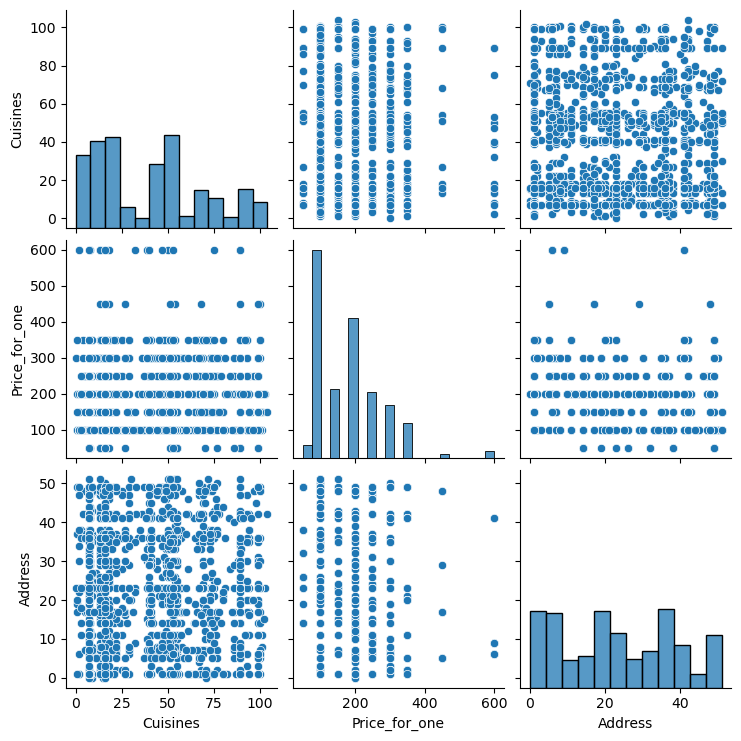

In [25]:
sns.pairplot(df)

In [26]:
#linear regression cannot be applied because there is no correlation is present between the features adn aven accuracy is low

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [28]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred_dtc = dtc.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score, precision_score

In [31]:
accuracy_score(y_test,y_pred_dtc)

0.1936619718309859

In [32]:
precision_score(y_test, y_pred_dtc,pos_label='positive',average='micro')

C:\Users\Dhananjay Metangale\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.1936619718309859

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [34]:
lr.fit(x_train, y_train)

LogisticRegression()

In [35]:
y_pred_log = lr.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score

In [37]:
accuracy_score(y_test, y_pred_log)

0.3767605633802817

In [38]:
precision_score(y_test, y_pred_log, average='micro')

0.3767605633802817

### Random Forest Classifier

In [39]:
number_of_trees = [20,25,30,35,40,45,50]
max_number_of_features = ['sqrt','log2']
criterion = ['gini','entropy', 'log_loss']
maximum_depths = [5,6,7,8,9,10]
minimum_sample_split = [10,11,12,13,14,15,16,17,18,19,20]

In [40]:
random_grid = {'n_estimators':number_of_trees,
              'max_features':max_number_of_features,
              'criterion':criterion,
              'max_depth':maximum_depths,
              'min_samples_split':minimum_sample_split}

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [42]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=12, cv=5, n_jobs= -1)

In [43]:
rscv.fit(x_train, y_train)

C:\Users\Dhananjay Metangale\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dhananjay Metangale\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dhananjay Metangale\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Dhananjay Metangale\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=12,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [10, 11, 12, 13,
                                                              14, 15, 16, 17,
                                                              18, 19, 20],
                                        'n_estimators': [20, 25, 30, 35, 40, 45,
                                                         50]})

In [44]:
rscv.best_params_

{'n_estimators': 40,
 'min_samples_split': 16,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'gini'}

In [45]:
rf_new = RandomForestClassifier(n_estimators=rscv.best_params_['n_estimators'],
                                min_samples_split=rscv.best_params_['min_samples_split'],
                                max_features=rscv.best_params_['max_features'],
                                max_depth=rscv.best_params_['max_depth'],
                                criterion=rscv.best_params_['criterion'])

In [46]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_split=16,
                       n_estimators=40)

In [47]:
y_pred_rf = rf_new.predict(x_test)

In [48]:
precision_score(y_test, y_pred_rf,average='micro')

0.3380281690140845

In [49]:
import requests
import json
from pprint import pprint

In [50]:
response = requests.get('http://https://jsonplaceholder.typicode.com/todos')
meaningful_response = json.loads('response.txt')
pprint(meaningful_response)

ConnectionError: HTTPConnectionPool(host='https', port=80): Max retries exceeded with url: //jsonplaceholder.typicode.com/todos (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000246909B6AF0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))